In [374]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets


In [375]:
dataset = datasets.make_blobs()
X, y = dataset
X.shape, y.shape

((100, 2), (100,))

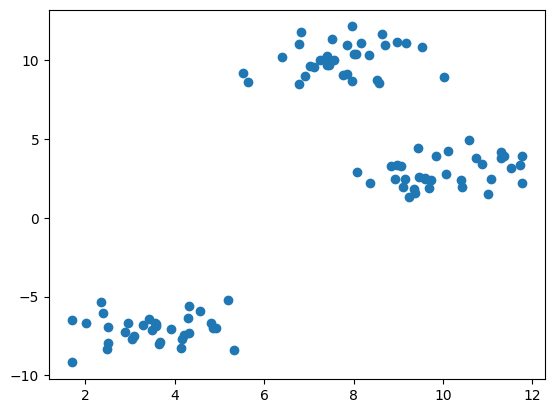

In [376]:
plt.scatter(X[:,0], X[:,1])

In [377]:
class kmeans:
    def __init__(self, k,X):
        self.k = k
        self.rand_centroids(X)
        
    def dist(self, data):
        # clusters = M_C, N
        # Points = M_P, N or data
        # M_C, M_P number of points in the row, and number of clusters in the columns
        points_2 = (data**2).sum(axis=1).reshape(-1,1)
        centroids_2 = (self.centroids**2).sum(axis=1).reshape(1,-11)
        prod = 2 * data @ self.centroids.T
        
        
        return np.sqrt(points_2 + centroids_2 - prod)
    
    def label(self, data):
        self.d = self.dist(X)
        labels = np.argmin(self.d, axis=1).reshape(-1,1)
        #labels = np.argmax(d).reshape(-1,1)
        return labels
    
    def rand_centroids(self, data):
        M, N = data.shape
        rand_idxs = np.arange(M)
        np.random.shuffle(rand_idxs)
        rand_idxs = rand_idxs[:self.k]
        #print(rand_idxs)
        self.centroids = data[rand_idxs]
        
    def fit(self,X):
        dist = self.dist(X)
        
        labels = np.argmin(dist, axis = 1).reshape(-1,1)

        for i in range(self.k):
            D = X[np.where(labels==i)[0]]
            self.centroids[i] = np.mean(D, axis=0)
            
            #print("CENTROIDS UPDATE ",self.centroids[i])
        
        
        
        
    

In [382]:
model = kmeans(k = 3,X=X)

In [383]:
k = 3
epochs = 100
model = kmeans(k = k,X=X)


for i in range(epochs):
    model.fit(X)

In [384]:
classes = []
for i in range(k):
    classes.append(X[np.where(model.label(X) == i)[0]])

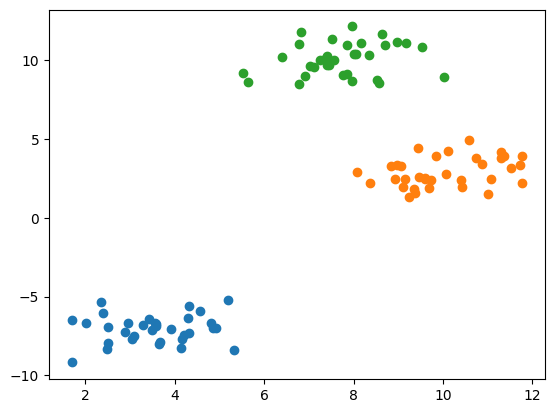

In [385]:
for points in classes:
    plt.scatter(points[:,0], points[:,1])